In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps
import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.linear_model import Perceptron

In [ ]:
pokemon = pd.read_csv('full_data.csv')

In [ ]:
# Taked the pokemon df and changes it into features and results
pokemon_np = pokemon.to_numpy()
pokemon_np = pokemon_np.astype(float)
features = pokemon_np[:, 1:-1]
print(features.shape)
results = pokemon_np[:, -1]

(5684, 96)


In [ ]:
clf = Perceptron(shuffle=False, verbose=0, eta0=.1, max_iter = 1000)

In [ ]:
clf.fit(features, results)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(features, results))
print(clf.n_iter_)

[[-1.154e+02  2.460e+01  3.350e+01  1.850e+01 -6.100e+00  5.400e+00
  -7.680e+01 -7.300e+01 -1.733e+02 -1.250e+02 -3.000e-01  1.020e+01
  -7.210e+01 -8.840e+01 -9.600e+00  8.700e+00  1.790e+01  3.830e+01
  -9.400e+01 -3.090e+01  7.920e+01 -5.940e+01  5.630e+01  6.310e+01
  -1.206e+02  7.230e+01 -2.540e+01  3.400e+00 -2.240e+01  3.530e+01
   3.000e+01 -7.820e+01  8.250e+01  1.733e+02 -8.760e+01 -5.330e+01
   2.630e+01  1.170e+01  2.600e+00  2.860e+01 -3.440e+01 -1.942e+02
   5.600e+00 -1.140e+01 -5.120e+01 -2.830e+01 -6.280e+01 -1.123e+02
  -5.490e+01 -1.130e+01  5.310e+01  1.320e+01 -3.180e+01  2.000e-01
   4.930e+01  7.000e+01  2.083e+02 -2.330e+01  1.500e+00 -2.630e+01
  -8.490e+01  1.180e+01  5.100e+00  3.330e+01 -1.535e+02 -6.870e+01
   9.500e+00  4.880e+01  1.490e+01 -9.200e+00 -3.860e+01 -3.760e+01
   3.058e+02  1.600e+00  1.710e+01  7.010e+01  3.650e+01  4.270e+01
  -5.670e+01  2.020e+01 -1.070e+01 -2.970e+01  8.910e+01 -4.140e+01
  -2.480e+01  5.560e+01  5.150e+01  7.930e+01  1

Note that it did find a linear seperable paramenter but it is about as good as geussing.

In [ ]:
clf = Perceptron(shuffle=True, verbose=0, eta0=.1)
clf.fit(features, results)
print(clf.coef_)
print(clf.score(features, results))

[[ -96.1   -8.7  -56.6  -50.8    5.9  -10.   -80.9    0.9 -273.2 -117.9
   -52.    35.   -49.2  -62.3 -114.1   -2.9  -57.8   -8.    13.2   26.1
    54.2   51.6   30.2  -30.  -235.5   61.5  -90.4  -44.8   44.7   45.4
     9.4 -132.4   94.8  216.1   -6.5  -33.3  -45.    68.3   78.9  -34.3
     6.6 -251.   -33.   -48.8    2.1   -9.2  -76.3  -33.   -14.4  -95.
   123.4   82.9  -27.3  -41.    -1.7   25.7  354.6  -26.1  -74.1  -81.2
  -110.7   -3.1   23.7  -68.7  -93.5 -139.    76.6   56.9   75.3   -7.
   -17.9    7.   321.4  -23.    13.5  -52.4   42.    85.9  -70.8   94.8
   162.8  -99.7   43.9  -30.8    8.8  -51.8   91.1  -12.4  -48.6   12.7
     9.5   17.    59.3   61.9   72.2   -6.3]]
0.49489795918367346


It does seem like shuffling the data can improve the accuracy by a bit

In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Train with different learning rates

# Splits the data to 75/25
X_train, X_test, y_train, y_test = train_test_split(features, results, test_size = .25, shuffle = True)
hls = [2, 5, 10, 15]
epochs = []
acc_train = []
acc_test = []
for i in range(len(hls)):
  print(i)
  # Trains our model
  model = MLPClassifier(activation = 'relu', solver = 'sgd', alpha = 0, batch_size = 1, learning_rate_init = .001,
                        shuffle = True, momentum = 0, n_iter_no_change = 50, max_iter = 2500, hidden_layer_sizes=[hls[i]])
  clf = model.fit(X_train, y_train)

  # Appends epochs and ourt accuracies to there respective lists
  epochs.append(clf.n_iter_)
  acc_train.append(clf.score(X_train, y_train))
  acc_test.append(clf.score(X_test, y_test))

0
1
2
3


In [ ]:
best_index = np.argmax(acc_test)
print(best_index)
best_hls = hls[best_index]
hls_best_acc = acc_test[best_index]
table_hls = pd.DataFrame(np.array([hls, epochs, acc_train, acc_test]).T, columns = ["Number of Hidden Layers", "Epochs", "Training Accuracy", "Test Accuracy"])
print(table_hls)

3
   Number of Hidden Layers  Epochs  Training Accuracy  Test Accuracy
0                      2.0    56.0           0.508327       0.515130
1                      5.0   304.0           0.508327       0.515130
2                     10.0    53.0           0.508327       0.515834
3                     15.0   139.0           0.511377       0.522871


In [ ]:
# Train with different learning rates

# Splits the data to 75/25
X_train, X_test, y_train, y_test = train_test_split(features, results, test_size = .25, shuffle = True)

# Gets a list of the learnign rates we are using
lr = [.0001, .001, .01, .05, .075, .1, 1]
epochs = []
acc_train = []
acc_test = []
for i in range(len(lr)):
  print(i)
  # Trains our model
  model = MLPClassifier(activation = 'relu', solver = 'sgd', alpha = 0, batch_size = 1, learning_rate_init = lr[i],
                        shuffle = True, momentum = 0, n_iter_no_change = 50, max_iter = 2500, hidden_layer_sizes=[15])
  clf = model.fit(X_train, y_train)

  # Appends epochs and ourt accuracies to there respective lists
  epochs.append(clf.n_iter_)
  acc_train.append(clf.score(X_train, y_train))
  acc_test.append(clf.score(X_test, y_test))


0
1
2
3
4
5
6


In [ ]:
best_index = np.argmax(acc_test)
print(best_index)
best_lr = lr[best_index]
lr_best_acc = acc_test[best_index]
table = pd.DataFrame(np.array([lr, epochs, acc_train, acc_test]).T, columns = ["Learning Rate", "Epochs", "Training Accuracy", "Test Accuracy"])
print(table)

1
   Learning Rate  Epochs  Training Accuracy  Test Accuracy
0         0.0001  1058.0           0.606850       0.522871
1         0.0010   703.0           0.534131       0.524982
2         0.0100    64.0           0.507624       0.517241
3         0.0500    97.0           0.492376       0.482759
4         0.0750    82.0           0.507624       0.517241
5         0.1000   110.0           0.507624       0.517241
6         1.0000   144.0           0.507624       0.517241


Text(0, 0.5, 'Accuracy')

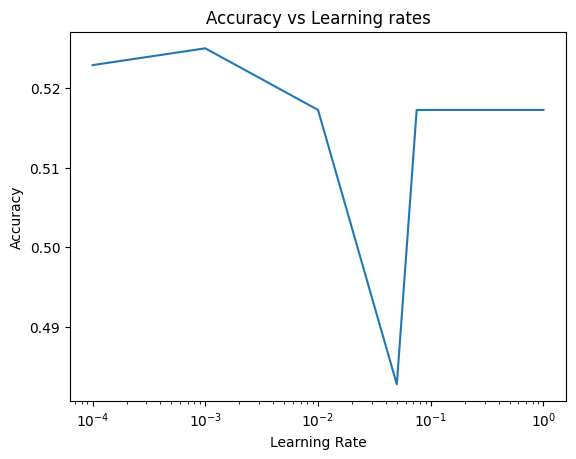

In [ ]:
plt.semilogx(np.array(table[table.columns[0]]), np.array(table[table.columns[3]]))
plt.title("Accuracy vs Learning rates")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")

Examinining this data emphasizes that we can only just barely do better than guessing

In [ ]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
pca = PCA(n_components=25)
pca.fit(features, y = results)
X = pca.transform(features)
model = MLPClassifier(activation = 'relu', solver = 'sgd', alpha = 0, batch_size = 1, learning_rate_init = .001,
                      shuffle = True, momentum = 0, n_iter_no_change = 50, max_iter = 2500, hidden_layer_sizes=[15])
print(i)
model.fit(X, results)
print(model.score(X, results))

6
0.5233990147783252
